**Корректность проверена на Python 3.7:**
+ numpy 1.14.5

# Доверительные интервалы для доли 

## Генерация данных

In [16]:
import numpy as np

In [17]:
print(np.__version__)

1.22.3


In [18]:
np.random.seed(1)

statistical_population = np.random.randint(2, size = 100000) 

random_sample = np.random.choice(statistical_population, size = 1000)

In [19]:
#истинное значение доли
statistical_population.mean()

0.49771

## Точечная оценка доли

In [20]:
random_sample.mean()

0.502

## Доверительный интервал для доли

In [21]:
from statsmodels.stats.proportion import proportion_confint

### Доверительный интервал на основе нормального распределения

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [22]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [23]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.471010, 0.532990] with width 0.061979


### Доверительный интервал Уилсона

$$\frac1{ 1 + \frac{z^2}{n} } \left( \hat{p} + \frac{z^2}{2n} \pm z \sqrt{ \frac{ \hat{p}\left(1-\hat{p}\right)}{n} + \frac{
z^2}{4n^2} } \right), \;\; z \equiv z_{1-\frac{\alpha}{2}}$$ 

In [9]:
wilson_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'wilson')

In [10]:
print('wilson_interval [%f, %f] with width %f' % (wilson_interval[0],
                                                  wilson_interval[1],
                                                  wilson_interval[1] - wilson_interval[0]))

wilson_interval [0.471062, 0.532922] with width 0.061860


## Размер выборки для интервала заданной ширины

In [30]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [12]:
n_samples = int(np.ceil(samplesize_confint_proportion(random_sample.mean(), 0.01)))
n_samples

9604

In [13]:
np.random.seed(1)
random_sample = np.random.choice(statistical_population, size = n_samples)

In [14]:
normal_interval = proportion_confint(sum(random_sample), len(random_sample), method = 'normal')

In [15]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1],
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.481776, 0.501773] with width 0.019997


In [45]:
normal_interval = proportion_confint(1, 50, method = 'normal', alpha=0.05)

In [46]:
print('normal_interval [%f, %f] with width %f' % (normal_interval[0],
                                                  normal_interval[1], 
                                                  normal_interval[1] - normal_interval[0]))

normal_interval [0.000000, 0.058805] with width 0.058805


In [36]:
n_samples = int(np.ceil(samplesize_confint_proportion(0.02, 0.01, alpha=0.05)))

print(n_samples)


753


In [37]:
import matplotlib.pyplot as plt


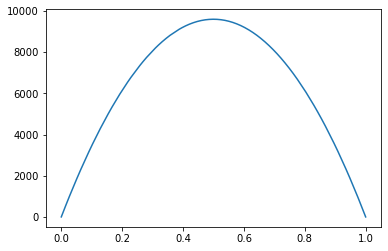

In [40]:
x = np.linspace(0., 1., 1000)
y = [int(np.ceil(samplesize_confint_proportion(i, 0.01))) for i in x]
plt.plot(x, y)
plt.show();

In [44]:
n_samples = int(np.ceil(samplesize_confint_proportion(0.49, 0.01, alpha=0.05)))

print(n_samples)



9600


In [ ]:
9604